<a href="https://colab.research.google.com/github/jackiekuen2/coursera-tensorflow/blob/master/Course_3_Week_4_Exercise_Shakespeare_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu==2.0.0-rc0

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.0.0-rc0


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
from tensorflow.keras import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [ ]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n") #


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2019-09-06 02:34:14--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 2a00:1450:4013:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2019-09-06 02:34:14 (168 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [ ]:
# Preview some data
print(len(data))
print(data[:100])
print(type(data))

93578
FROM fairest creatures we desire increase,
That thereby beauty's rose might never die,
But as the ri
<class 'str'>


In [ ]:
print(len(corpus))
print(corpus[:3])
print(type(corpus))

2159
['from fairest creatures we desire increase,', "that thereby beauty's rose might never die,", 'but as the riper should by time decease,']
<class 'list'>


In [ ]:
print(total_words)
print(max_sequence_len)

3211
11


In [ ]:
print(len(input_sequences))
print(input_sequences[0:11])

15462
[[  0   0   0   0   0   0   0   0   0  34 417]
 [  0   0   0   0   0   0   0   0  34 417 877]
 [  0   0   0   0   0   0   0  34 417 877 166]
 [  0   0   0   0   0   0  34 417 877 166 213]
 [  0   0   0   0   0  34 417 877 166 213 517]
 [  0   0   0   0   0   0   0   0   0   8 878]
 [  0   0   0   0   0   0   0   0   8 878 134]
 [  0   0   0   0   0   0   0   8 878 134 351]
 [  0   0   0   0   0   0   8 878 134 351 102]
 [  0   0   0   0   0   8 878 134 351 102 156]
 [  0   0   0   0   8 878 134 351 102 156 199]]


In [ ]:
model = Sequential()
model.add(Embedding(total_words, 128, input_length=max_sequence_len-1)) # Your Embedding Layer
model.add(Bidirectional(LSTM(150, return_sequences=True))) # An LSTM Layer
model.add(Dropout(0.2))# A dropout layer
model.add(LSTM(100))# Another LSTM Layer)
model.add(Dense(total_words/2, 
                activation='relu', 
                kernel_regularizer=regularizers.l2(0.01))) # A Dense Layer including regularizers
model.add(Dense(total_words, activation='softmax'))# A Dense Layer

model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.001), 
              metrics=['accuracy']) # Pick a loss function and an optimizer

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 128)           411008    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           334800    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,225,179
Trainable params: 6,225,179
Non-trainable params: 0
______________________________________________

In [ ]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Train on 15462 samples
Epoch 1/100
15462/15462 [==============================] - 15s 958us/sample - loss: 6.9134 - accuracy: 0.0221
Epoch 2/100
15462/15462 [==============================] - 7s 467us/sample - loss: 6.4973 - accuracy: 0.0205
Epoch 3/100
15462/15462 [==============================] - 7s 458us/sample - loss: 6.3936 - accuracy: 0.0235
Epoch 4/100
15462/15462 [==============================] - 7s 456us/sample - loss: 6.2657 - accuracy: 0.0290
Epoch 5/100
15462/15462 [==============================] - 7s 458us/sample - loss: 6.1748 - accuracy: 0.0354
Epoch 6/100
15462/15462 [==============================] - 7s 461us/sample - loss: 6.0934 - accuracy: 0.0401
Epoch 7/100
15462/15462 [==============================] - 7s 456us/sample - loss: 6.0163 - accuracy: 0.0410
Epoch 8/100
15462/15462 [==============================] - 7s 451us/sample - loss: 5.9338 - accuracy: 0.0457
Epoch 9/100
15462/15462 [==============================] - 7s 457us/sample - loss: 5.8281 - accuracy: 0.

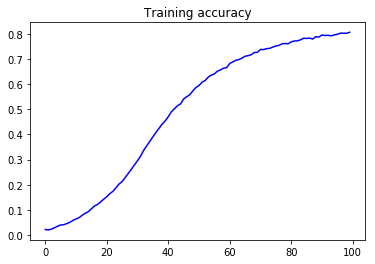

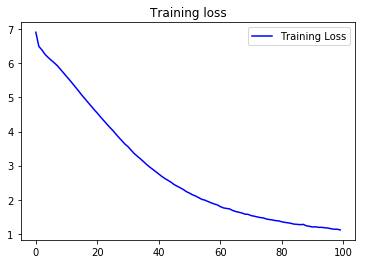

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
# seed_text = "Help me Obi Wan Kenobi, you're my only hope"
seed_text = "Hello darkness my old friend"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
    
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
    
print(seed_text)

Hello darkness my old friend from his truth is wrong tongue form torn mother express'd sit sit friend to show thee new still be to love should make her 'will' in approve her due on many every rare rare free bevel lie me still find thee long things took the heart of date days still eyed mother gone meet still still ever things his grief still make ill ' still shows show me ill to thee was him then worthy know i live as be away men's well shows bear youth born to die die die die me till him happy groan ' are no
